## Gating fixed primitives
AliGater contains a range of gating functions from the basic you expect to more niche functions. Below is a rough illustration of some standard _fixed_ gates. Many of these are used internally in AliGater pattern-recognition functions but might some times be useful for the user directly. 

For exact usage of each function, please refer to the functions documentation.

See the 'example strategy' notebook for a more coherent way of stringing functions & pattern recognition together to achieve flexible solutions.

In [1]:
import aligater as ag

AliGater started in Jupyter mode


In [2]:
fcs = ag.loadFCS(ag.AGConfig.ag_home+"tutorial/data/example1.fcs", flourochrome_area_filter=True, return_type="agsample")

Opening file example1 from folder /tutorial/data
Loaded dataset with 1000000 events.


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9a0f9e3c90>)

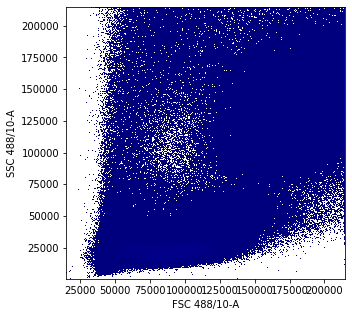

In [3]:
#Overview of the ungated sample in forward and sidescatter
ag.plotHeatmap(fcs(), x="FSC 488/10-A", y="SSC 488/10-A")

**gateThreshold** can be used to cut a view, either 1-dimensionally (producing a density histogram) or 2-dimensionally, drawing a straight line in the 2D-view. 

The version used will depend on the presence of a 'yCol' argument

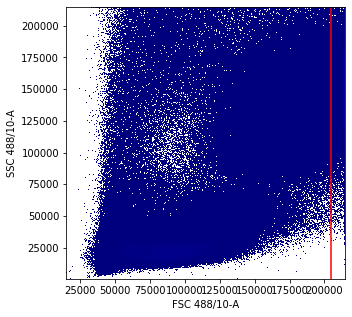

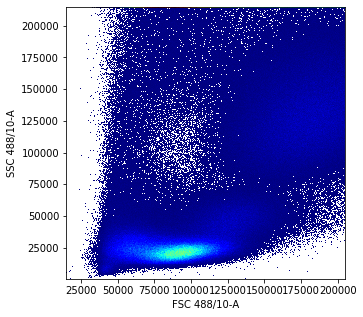

In [4]:
ag.gateThreshold(fcs, name="tmp", xCol="FSC 488/10-A", yCol="SSC 488/10-A", thresh=205000, orientation='vertical', population='lower')

<Figure size 360x360 with 0 Axes>

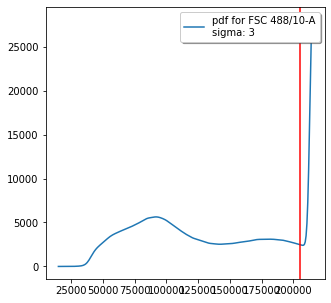

In [5]:
#The same cut again, but in a 1-D histogram
#We will save the output gate object as 'no_clutter'.
no_clutter = ag.gateThreshold(fcs, name="tmp", xCol="FSC 488/10-A",  thresh=205000, population='lower')

**quadGate** lets you draw a standard four field gate, returning four AGgate objects

The AGgate objects are returned clockwise, in order: top-left, top-right, bottom-right, bottom-left

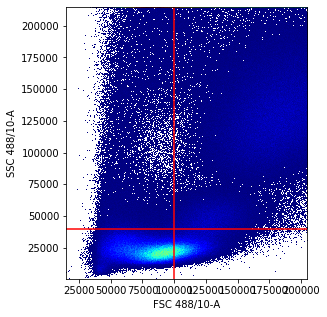

In [6]:
topLeft, topRight, bottomRight, bottomLeft = ag.quadGate(fcs, names=['1','2','3','4'], xCol="FSC 488/10-A", yCol="SSC 488/10-A", parentGate=no_clutter,
                                                        xThresh=100000,yThresh=40000)

**customQuadGate** is a useful similar function that lets you shift two limits in a quadgate. 

The thresholds are then passed as a list, one of the lines has to be fixed - i.e. their limits match.
The passed threshold-list should contain float limits, in order: ybottom, ytop, xleft, xright

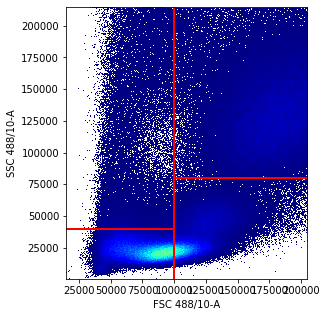

In [7]:
topLeft, topRight, bottomRight, bottomLeft = ag.customQuadGate(fcs, names=["1","2","3","4"], xCol="FSC 488/10-A", yCol="SSC 488/10-A", parentGate=no_clutter,
                                                              threshList=[100000,100000, 40000,80000])

**boxGate** draws a box-gate in the view

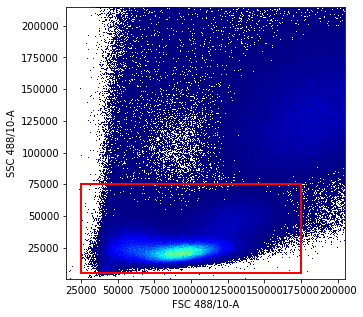

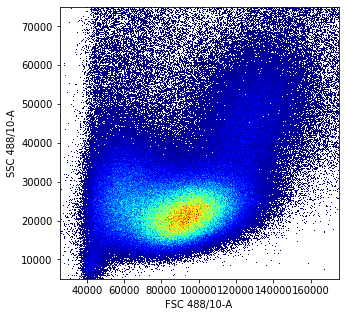

In [8]:
box_pop = ag.gateBox(fcs, name="tmp", xCol="FSC 488/10-A", yCol="SSC 488/10-A", parentGate=no_clutter,
                    xThreshLeft=25000,xThreshRight=175000, yThreshBottom=5000, yThreshTop=75000)

**EllipseGate** draws a circle or ellipse in the view

NOTE: this function is a wrapper for gateEllipsoid which is implemented in cython, that function can be used instead. 

NOTE2: if gating an ellipse in a view with scales applied such as bilog or logish, width and heigh should be passed in the transformed scale.

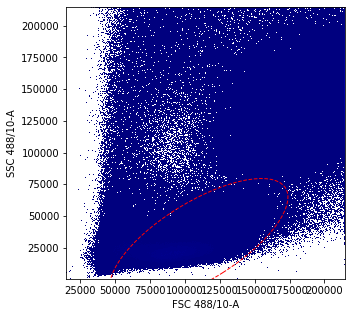

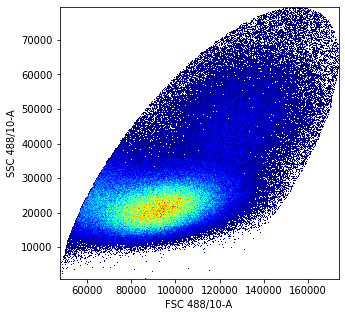

<Figure size 360x360 with 0 Axes>

In [11]:
ag.EllipseGate(fcs, name="tmp", xCol="FSC 488/10-A", yCol="SSC 488/10-A", parentGate=None,
              center=[110000,30000],width=75000, height=30000, angle=35)